In [1]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import box
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pathlib2 import Path

import rasterio as rio
import geopandas as gpd
import shapefile as shp
import fiona
from osgeo import ogr

from mlib import *

In [2]:
data_root = Path(r'D:\Dataset\satellite')
shape_root = data_root / 'JECAM CropID ShpFile 2019'
img_root = data_root / 'JECAM UAV 2019'

# fp_poly_gcs = str(shape_root / 'CHANDPASHA' / 'Barisal_Chandpasha_JECAM_20190310.shp')
# fp_poly_gcs = r'D:\Sat\CropID (shp files)\Chandpasha\Barisal_Chandpasha_crop_type_20190310.shp'
# fp_poly_gcs = r'D:\Sat\CropID (shp files)\Sayestabad Uttar Char Aicha\bar_sayestabad_uttar_char_aicha_crop_type_20190311.shp'
fp_poly_gcs = r'D:\Sat\CropID (shp files)\Ulal Batna\BarisaL-Ulal_Batna_Crop_type_2019.shp'
name = Path(fp_poly_gcs).parts[-2]
print(name)

Ulal Batna


In [3]:
poly_gcs= gpd.GeoDataFrame.from_file(fp_poly_gcs)
print(type(poly_gcs))
poly_gcs.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


Id     Crop_type                                           geometry
0   0        Fallow  POLYGON ((227151.163 2519211.397, 227119.079 2...
1   0  Bottle gourd  POLYGON ((226866.657 2519453.377, 226864.825 2...
2   0          Jute  POLYGON ((226895.377 2519444.502, 226906.596 2...
3   0  Red amaranth  POLYGON ((226982.666 2519272.932, 226982.603 2...
4   0          Jute  POLYGON ((226888.470 2519409.458, 226875.361 2...

In [4]:
def edge_length(poly_gcs):
    piece = np.array([i.bounds for i in poly_gcs['geometry']])
    minx = piece[:,0].min()
    miny = piece[:,1].min()
    maxx = piece[:,2].max()
    maxy = piece[:,3].max()
    return round(maxx-minx,3), round(maxy-miny,3)

lengths = edge_length(poly_gcs)
print('X length:',lengths[0], 'Y length:', lengths[1])

X length: 444.759 Y length: 587.762


In [5]:
shape = shp.Reader(fp_poly_gcs)

In [6]:
shape = fiona.open(fp_poly_gcs)
print (shape.schema)

#first feature of the shapefile
first = shape.next()
print (first) 

{'properties': OrderedDict([('Id', 'int:6'), ('Crop_type', 'str:50')]), 'geometry': 'Polygon'}
{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('Id', 0), ('Crop_type', 'Fallow')]), 'geometry': {'type': 'Polygon', 'coordinates': [[(227151.16260755528, 2519211.3971989863), (227119.07889068034, 2519211.843582509), (227117.65013782308, 2519198.508555839), (227115.11013274267, 2519198.667306157), (227115.44615425728, 2519168.453813443), (227115.04927846137, 2519162.3683846053), (227100.29872812796, 2519163.0959902294), (227099.7706628265, 2519176.626808949), (227099.29000214487, 2519197.7397192325), (227072.96390782576, 2519197.14440554), (227063.55409502517, 2519196.7971619293), (227063.40581579227, 2519208.805939283), (227062.19511298276, 2519208.8816082105), (227062.1931397561, 2519221.391311679), (227062.26722323708, 2519233.517190093), (227106.17491521966, 2519230.223121008), (227121.89119665232, 2519227.0534063336), (227136.54914263356, 2519225.296569489), (227151.6304227961

In [61]:
file = ogr.Open(fp_poly_gcs)
shape = file.GetLayer(0)
print(shape)

<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x000001457B55ACF0> >


In [10]:
#%matplotlib inline
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

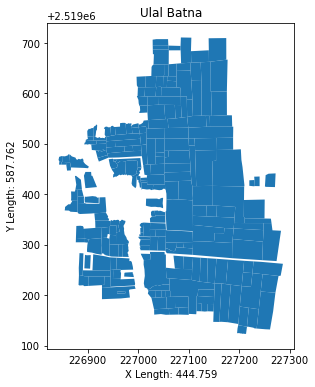

In [63]:
# Import NY Ctate County Shape file 
ax=poly_gcs.plot(figsize=(6,6))
lengths = edge_length(poly_gcs)

ax.set_title(name)
ax.set_xlabel(f'X Length: {lengths[0]}')
ax.set_ylabel(f'Y Length: {lengths[1]}')

plt.savefig(f'{name}.png')

<AxesSubplot:>

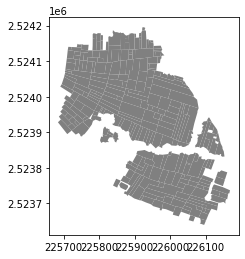

In [11]:
### Change color of map
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['grey'])
poly_gcs.plot(cmap=cmap)

In [12]:
## Plot catgorical data
fig, ax = plt.subplots(figsize=(8, 8))
poly_gcs.plot(column='LAI_left',
                categorical=True,
                legend=True,
                ax=ax)

# adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.25,1.25))
ax.set_axis_off()
plt.show()

KeyError: 'LAI_left'

# Image Data Processing

In [12]:
rgb_path = img_root / 'CHANDPASHA' / 'RGB' / 'BAR_CHAND_RGB_150M_20190310.tif'
hsi_path = img_root / 'CHANDPASHA' / 'Multispectral' / 'BAR_CHAND_SLANTR_150M_20190310.tif'

In [13]:
rgb_img = mio.load(rgb_path)
print(rgb_img.shape)

(24880, 19318, 3)


In [14]:
hsi_img = mio.load(hsi_path)
print(hsi_img.shape)

(8854, 7657)


(-0.5, 19317.5, 24879.5, -0.5)

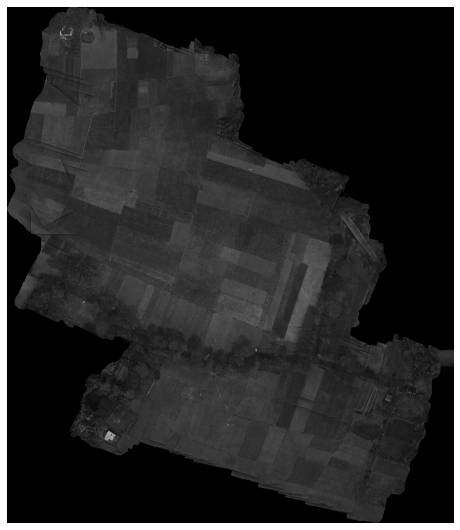

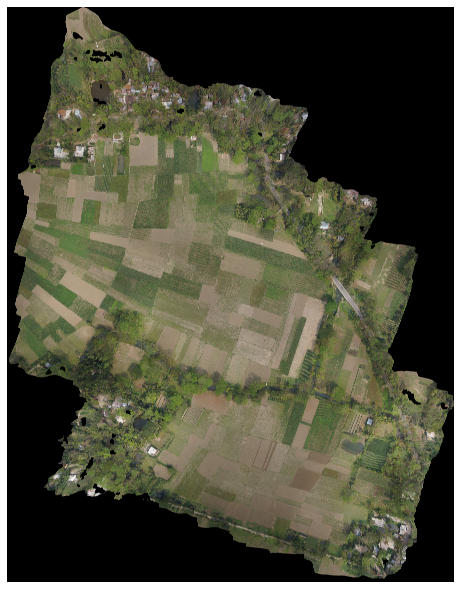

In [15]:
plt.figure(figsize=(8,12))
plt.imshow(hsi_img, cmap='gray')
plt.axis('off')

plt.figure(figsize=(8,12))
plt.imshow(rgb_img)
plt.axis('off')

In [15]:
import cv2 
import numpy as np 

In [38]:
img1 = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
img2 = hsi_img
img_for_match=rgb_img

height, width = img2.shape

print(img1.shape, img2.shape)

(24880, 19318) (8854, 7657)


In [ ]:
# # Open the image files. 
# img1_color = cv2.imread("align.jpg")  # Image to be aligned. 
# img2_color = cv2.imread("ref.jpg")    # Reference image. 
  
# # Convert to grayscale. 
# img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY) 
# img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY) 
# height, width = img2.shape 

In [35]:
# Create ORB detector with 5000 features. 
orb_detector = cv2.ORB_create(5000) 
  
# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
#  (which is not reqiured in this case). 
kp1, d1 = orb_detector.detectAndCompute(img1, None) 
kp2, d2 = orb_detector.detectAndCompute(img2, None) 
  
# Match features between the two images. 
# We create a Brute Force matcher with  
# Hamming distance as measurement mode. 
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 

# Match the two sets of descriptors. 
matches = matcher.match(d1, d2) 
  
# Sort matches on the basis of their Hamming distance. 
matches.sort(key = lambda x: x.distance) 
  
# Take the top 90 % matches forward. 
matches = matches[:int(len(matches)*90)] 
no_of_matches = len(matches) 

# Define empty matrices of shape no_of_matches * 2. 
p1 = np.zeros((no_of_matches, 2)) 
p2 = np.zeros((no_of_matches, 2)) 

In [48]:
for i in range(len(matches)): 
  p1[i, :] = kp1[matches[i].queryIdx].pt 
  p2[i, :] = kp2[matches[i].trainIdx].pt 
  
# Find the homography matrix. 
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
  
# Use this matrix to transform the 
# colored image wrt the reference image. 
transformed_img = cv2.warpPerspective(img_for_match,
                    homography, (width, height)) 
  
# Save the output. 
# cv2.imwrite('output_rgb.jpg', transformed_img)
mio.dump(transformed_img, 'output_rgb.jpg')

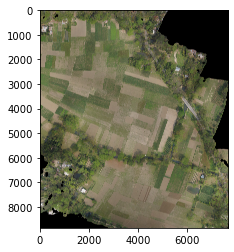

In [47]:
plt.imshow(transformed_img)

True

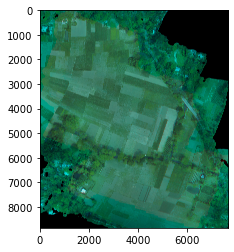

In [74]:
merged_img=transformed_img.copy()
# merged_img[:,:,0]=np.ones_like(merged_img[:,:,0], dtype=np.uint8)#(hsi_img/hsi_img.max()).astype(np.uint8)
merged_img[:,:,0]=(hsi_img.astype(float)*255/hsi_img.max()).astype(np.uint8)

plt.imshow(merged_img)
cv2.imwrite('merged_false_rgb.jpg', merged_img)

In [80]:
hsi_img.mean()

9.613388364270339

In [79]:
(hsi_img.astype(float)*255/hsi_img.max()).astype(np.uint8).mean()

28.840165092811016

98.81585630744462

In [38]:
def image_registeration(source_image, target_image, feature_num=5000):
    img1 = source_image if len(target_image.shape)<3 else cv2.cvtColor(source_image, cv2.COLOR_RGB2GRAY)
    img2 = target_image if len(target_image.shape)<3 else cv2.cvtColor(target_image, cv2.COLOR_RGB2GRAY)

    height, width = img2.shape

    # Create ORB detector with 5000 features. 
    orb_detector = cv2.ORB_create(feature_num) 
    
    # Find keypoints and descriptors. 
    # The first arg is the image, second arg is the mask 
    #  (which is not reqiured in this case). 
    kp1, d1 = orb_detector.detectAndCompute(img1, None) 
    kp2, d2 = orb_detector.detectAndCompute(img2, None) 
    
    # Match features between the two images. 
    # We create a Brute Force matcher with  
    # Hamming distance as measurement mode. 
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 

    # Match the two sets of descriptors. 
    matches = matcher.match(d1, d2) 
    
    # Sort matches on the basis of their Hamming distance. 
    matches.sort(key = lambda x: x.distance) 
    
    # Take the top 90 % matches forward. 
    matches = matches[:int(len(matches)*90)] 
    no_of_matches = len(matches) 

    # Define empty matrices of shape no_of_matches * 2. 
    p1 = np.zeros((no_of_matches, 2)) 
    p2 = np.zeros((no_of_matches, 2)) 

    for i in range(len(matches)): 
        p1[i, :] = kp1[matches[i].queryIdx].pt 
        p2[i, :] = kp2[matches[i].trainIdx].pt 
        
    # Find the homography matrix. 
    homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
    
    # Use this matrix to transform the 
    # colored image wrt the reference image. 
    transformed_img = cv2.warpPerspective(source_image,
                        homography, (width, height)) 
    
    # Save the output. 
    # cv2.imwrite('output_rgb.jpg', transformed_img)
    # mio.dump(transformed_img, 'output_rgb.jpg')
    return transformed_img

In [15]:
transformed_img = mcv.image_registeration(rgb_img, hsi_img)

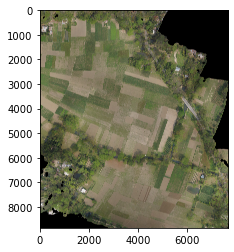

In [16]:
plt.imshow(transformed_img)

(335, 273, 3)


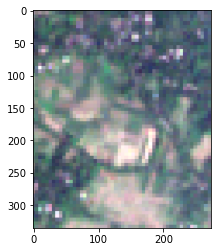

In [18]:
satellite = mio.load(r'C:\Users\miracleyoo\Downloads\subset_2_of_S2B_MSIL2A_20190308T042659_N9999_R133_T45QZF_20201201T073842_s2resampled_reprojected_RGB.png')
plt.imshow(satellite)
print(satellite.shape)

In [33]:
small_hsi = cv2.resize(hsi_img, (satellite.shape[1], satellite.shape[1]*hsi_img.shape[0]//hsi_img.shape[1]), interpolation = cv2.INTER_AREA)

(315, 273)


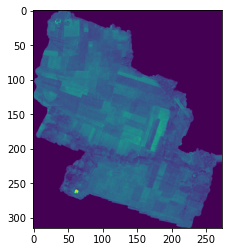

In [34]:
plt.imshow(small_hsi)
print(small_hsi.shape)

In [27]:
small_hsi

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [48]:
transformed_satellite = image_registeration(satellite, small_hsi, feature_num=100)

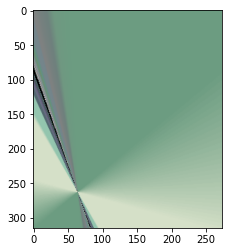

In [49]:
plt.imshow(transformed_satellite)

# Working with Raster Data

In [19]:
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask

from osgeo import gdal

In [123]:
# dim_path = r'D:\Sat\Sentinel-2\20190308\S2B_MSIL2A_20190308T042659_N9999_R133_T45QZF_20201201T073842_s2resampled_reprojected.dim'
# dim_path=r'D:\Sat\Sentinel-2\20190308\S2B_MSIL2A_20190308T042659_N9999_R133_T45QZF_20201201T073842.SAFE\MTD_MSIL2A.xml'#\MTD_MSIL2A.xml'
# dim_path = r'D:\Sat\Sentinel-2\20190308\S2B_MSIL1C_20190308T042659_N0207_R133_T45QZF_20190308T080731.SAFE\MTD_MSIL1C.xml'
# dim_path=r'D:\Sat\Planet\8Mar2019Barisal_PSScene4Band_Explorer'
dim_path=r'D:\Sat\JECAM UAV 2019\CHANDPASHA\RGB\BAR_CHAND_RGB_150M_20190310.tif'
# raster = gdal.Open(dim_path)
raster = rio.open(dim_path)

In [124]:
raster.count

3

In [ ]:
def reproject_et(inpath, outpath, new_crs):
    dst_crs = new_crs # CRS for web meractor 

    with rio.open(inpath) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        with rio.open(outpath, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)

In [139]:
# Load DEM
dem_path = "D:\Sat\JECAM UAV 2019\CHANDPASHA\RGB\BAR_CHAND_RGB_150M_20190310.tif"
GP_DEM=rio.open(dem_path)
print(GP_DEM.count)

3


In [125]:
# Load CO state boundary file
fp_co=r'D:\Sat\CropID (shp files)\Chandpasha\Barisal_Chandpasha_crop_type_20190310.shp'
CO_BD= gpd.GeoDataFrame.from_file(fp_co)

<AxesSubplot:>

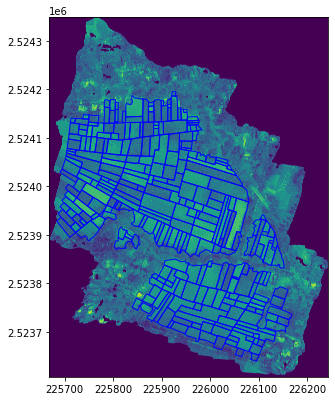

In [141]:
# Plot them
fig, ax = plt.subplots(figsize=(5, 15))
show(GP_DEM, ax=ax)
CO_BD.plot(ax=ax, facecolor='none', edgecolor='blue')

In [129]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [48]:
# json.loads(CO_BD.to_json())['features']

In [130]:
coords = getFeatures(CO_BD)
# print(coords)

In [133]:
# Clip the raster with Polygon
out_img, out_transform = mask(dataset=GP_DEM, shapes=coords, crop=True)
show(out_img)

In [134]:
# Copy the metadata
out_meta = GP_DEM.meta.copy()
print(out_meta)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 19318, 'height': 24880, 'count': 3, 'crs': CRS.from_dict(init='epsg:32646'), 'transform': Affine(0.029769200000000468, 0.0, 225668.407616765,
       0.0, -0.029769199999993355, 2524348.02929534)}


In [135]:
# Define EPSG:5070 projection
new_crs={'init': 'epsg:3106'}

In [136]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": new_crs}
                         )

In [ ]:
out_tif =("./CHAND_RGB.tif")
          
with rasterio.open(out_tif, "w", **out_meta) as dest:
        dest.write(out_img)

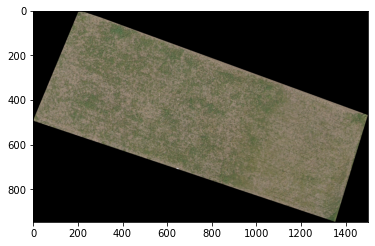

<AxesSubplot:>

In [138]:
show(out_img)

In [99]:
import geojson

In [47]:
gjson_path = r'D:\Sat\Planet\8Mar2019Barisal_PSScene4Band_Explorer\manifest.json'
# geojson.load(open(gjson_path,'r'))

# Resize the RGB tiff Images to the size of planet

In [3]:
root=r'L:\Satellite\prepared'
rgb_paths = glob.glob(root+r'\USA*\*_RGB_Whole')
print(rgb_paths)

['L:\\Satellite\\prepared\\USAR\\20190714_RGB_Whole', 'L:\\Satellite\\prepared\\USAU\\20191005_RGB_Whole']


In [4]:
from rasterio.enums import Resampling
from skimage.transform import resize

for rgb_path in rgb_paths:
    rgb_path = Path(rgb_path)
    rgb_file = str(rgb_path / (rgb_path.name+'.tif'))
    rgb_new_file = str(rgb_path / (rgb_path.name+'_psize.tif'))
    rgb_pkl_file = str(rgb_path / (rgb_path.name+'.pkl'))
    rgb_lr_pkl_file = str(rgb_path / (rgb_path.name+'_lr.pkl'))
    
    planet_path = Path(str(rgb_path).replace('RGB_Whole', 'Planet_Whole'))
    planet_file = str(planet_path / (planet_path.name+'.tif'))
    planet_pkl_file = str(planet_path / (planet_path.name+'.pkl'))
    
    sen_path = Path(str(rgb_path).replace('RGB_Whole', 'Sentinel_Whole'))
    sen_file = str(sen_path / (sen_path.name+'.tif'))
    sen_pkl_file = str(sen_path / (sen_path.name+'.pkl'))

    rgb_img = rio.open(rgb_file)
    planet_img = rio.open(planet_file)
    sent_img = rio.open(sen_file)

    res=rgb_img.read(
            out_shape=(
                rgb_img.count,
                int(sent_img.height*3),
                int(sent_img.width*3)
            ),
            resampling=Resampling.cubic
        )

    res_small=rgb_img.read(
            out_shape=(
                rgb_img.count,
                int(sent_img.height),
                int(sent_img.width)
            ),
            resampling=Resampling.cubic
        )

    transform=rgb_img.transform
    crs=rgb_img.crs
    profile=rgb_img.profile
    profile.update({
            'width': int(sent_img.width*3),
            'height': int(sent_img.height*3)
        })

    with rio.open(rgb_new_file,'w',driver='GTiff',
                height=int(sent_img.height*3),width=int(sent_img.width*3),
                count=rgb_img.count,dtype=profile['dtype'],
                crs=crs,transform=transform, nodata=0.0) as dst:
        dst.write(res)    

    mask=1-(((res==0).sum(axis=0))==3)
    re_planet_img = cv2.resize(planet_img.read().transpose(1,2,0), dsize=(int(sent_img.width*3),int(sent_img.height*3)), interpolation=cv2.INTER_CUBIC).transpose(2,0,1)
    pres = mask*re_planet_img

    sent_img = rio.open(sen_file)
    sent_rgb = cv2.resize(res.transpose(1,2,0), dsize=(sent_img.width,sent_img.height), interpolation=cv2.INTER_CUBIC).transpose(2,0,1)
    smask = 1-(((sent_rgb==0).sum(axis=0))==3)
    sres = smask*sent_img.read()

    mio.dump(res.transpose(1,2,0), rgb_pkl_file)
    mio.dump(res_small.transpose(1,2,0), rgb_lr_pkl_file)

    mio.dump(pres.transpose(1,2,0), planet_pkl_file)
    mio.dump(sres.transpose(1,2,0), sen_pkl_file)

    # break

In [117]:
sent_rgb.shape

(49, 56, 3)

In [101]:
mask=1-(((res==0).sum(axis=0))==3)

(3, 180, 138)


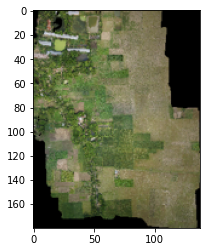

<AxesSubplot:>

In [148]:
print(res.shape)
show(res)

(3, 60, 46)


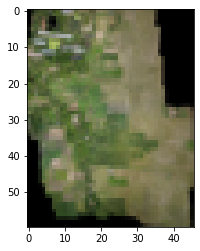

<AxesSubplot:>

In [150]:
print(res_small.shape)
show(res_small)

(10, 60, 46)


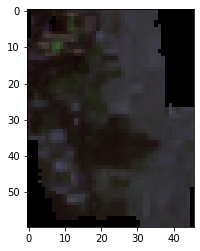

<AxesSubplot:>

In [149]:
print(sres.shape)
show(sres[:3,:,:])

In [6]:
cv2.resize(sres.transpose(1,2,0), (sres.shape[1]//3,sres.shape[2]//3), interpolation=cv2.INTER_CUBIC).transpose(2,0,1)

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3922: error: (-215:Assertion failed) func != 0 in function 'cv::hal::resize'


In [7]:
sres.shape[1]//3,sres.shape[2]//3

(164, 160)

(4, 180, 138)


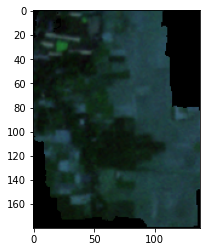

<AxesSubplot:>

In [151]:
print(pres.shape)
show(pres[:3,:,:])

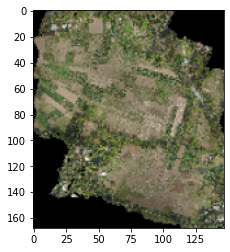

In [144]:
plt.imshow(res.transpose(1,2,0))

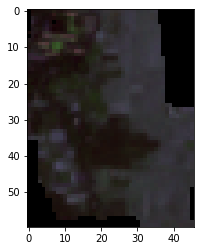

In [138]:
import pickle as pkl

with open(r'L:\Satellite\prepared\ULAL\20190402_Sentinel_Whole\20190402_Sentinel_Whole.pkl', 'rb') as f:
    pkl_img = pkl.load(f)

plt.imshow(pkl_img[:,:,:3])

In [64]:
rgb_img.read().shape

(3, 19660, 15045)

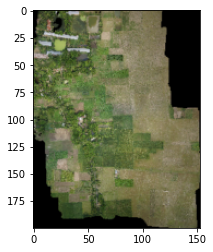

<AxesSubplot:>

In [69]:
show(rio.open(r'L:\Satellite\prepared\ULAL\20190402_RGB_Whole\20190402_RGB_Whole_psize.tif').read())

In [ ]:
# from rasterio.enums import Resampling
# from skimage.transform import resize

# for rgb_path in rgb_paths:
#     rgb_path = Path(rgb_path)
#     rgb_file = str(rgb_path / (rgb_path.name+'.tif'))
#     rgb_new_file = str(rgb_path / (rgb_path.name+'_psize.tif'))
#     rgb_pkl_file = str(rgb_path / (rgb_path.name+'.pkl'))
    
#     planet_path = Path(str(rgb_path).replace('RGB_Whole', 'Planet_Whole'))
#     planet_file = str(planet_path / (planet_path.name+'.tif'))
#     planet_pkl_file = str(planet_path / (planet_path.name+'.pkl'))
    
#     sen_path = Path(str(rgb_path).replace('RGB_Whole', 'Sentinel_Whole'))
#     sen_file = str(sen_path / (sen_path.name+'.tif'))
#     sen_pkl_file = str(sen_path / (sen_path.name+'.pkl'))


#     rgb_img = rio.open(rgb_file)
#     planet_img = rio.open(planet_file)
#     res=rgb_img.read(
#             out_shape=(
#                 rgb_img.count,
#                 int(planet_img.height),
#                 int(planet_img.width)
#             ),
#             resampling=Resampling.bilinear
#         )
    
#     transform=rgb_img.transform
#     crs=rgb_img.crs
#     profile=rgb_img.profile
#     profile.update({
#             'width': planet_img.width,
#             'height': planet_img.height
#         })

#     with rio.open(rgb_new_file,'w',driver='GTiff',
#                     height=planet_img.height,width=planet_img.width,
#                     count=rgb_img.count,dtype=profile['dtype'],
#                     crs=crs,transform=transform, nodata=0.0) as dst:
#             dst.write(res)    

#     mask=1-(((res==0).sum(axis=0))==3)
#     pres = mask*planet_img.read()

#     sent_img = rio.open(sen_file)
#     sent_rgb = cv2.resize(res.transpose(1,2,0), dsize=(sent_img.width,sent_img.height), interpolation=cv2.INTER_CUBIC).transpose(2,0,1)
#     smask = 1-(((sent_rgb==0).sum(axis=0))==3)
#     sres = smask*sent_img.read()

#     mio.dump(res.transpose(1,2,0), rgb_pkl_file)
#     mio.dump(pres.transpose(1,2,0), planet_pkl_file)
#     mio.dump(sres.transpose(1,2,0), sen_pkl_file)